In [3]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import psycopg2 
from pandasql import sqldf
from datetime import datetime 


In [5]:
ti = pd.read_csv('titanic.csv')
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
ti.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
print(ti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [11]:
print(ti.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [13]:
spec_rows = ti.iloc[399:401]
spec_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
399,1291,0,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
400,1292,1,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S


In [15]:
spec_rows_loc = ti.loc[399:401]
spec_rows_loc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
399,1291,0,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
400,1292,1,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
401,1293,0,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S


In [17]:
total_survived = ti.groupby('Survived')['PassengerId'].count().reset_index() 
total_survived

,Survived,PassengerId
0,0,266
1,1,152


In [19]:
# Filter rows Age less than 20
filtered_age = ti[ti['Age'] < 20]

# Save the filtered data to a new CSV file
filtered_age.to_csv('filtered_age.csv', index=False)
fl = pd.read_csv('filtered_age.csv')
fl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
1,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
2,913,0,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S
3,927,0,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C
4,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q


In [21]:
print(ti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [23]:
#Covert data type to smaller integer type
ti['Survived'] = ti['Survived'].astype('int8')
ti['Pclass'] = ti['Pclass'].astype('int8')
ti['SibSp'] = ti['SibSp'].astype('int8')
ti['Parch'] = ti['SibSp'].astype('int8')
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int8   
 2   Pclass       418 non-null    int8   
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int8   
 7   Parch        418 non-null    int8   
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(1), int8(4), object(5)
memory usage: 27.9+ KB


In [25]:
#Handle missing data using df.isnull().sum() to count null values in the DataFrame.

ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
#Drop rows with null values using df.dropna(). Fill missing values in the DataFrame using df.fillna().

ti2 = ti.dropna()
ti2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int8   
 2   Pclass       87 non-null     int8   
 3   Name         87 non-null     object 
 4   Sex          87 non-null     object 
 5   Age          87 non-null     float64
 6   SibSp        87 non-null     int8   
 7   Parch        87 non-null     int8   
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        87 non-null     object 
 11  Embarked     87 non-null     object 
dtypes: float64(2), int64(1), int8(4), object(5)
memory usage: 6.5+ KB


In [29]:
ti2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [31]:
ti2 = ti2.fillna(0)
ti2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,1,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,1,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,1,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,0,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
34,926,0,1,"Mock, Mr. Philipp Edmund",male,30.0,1,1,13236,57.7500,C78,C
44,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,1,11753,52.5542,D19,S
46,938,0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
50,942,0,1,"Smith, Mr. Lucien Philip",male,24.0,1,1,13695,60.0000,C31,S


In [33]:
ti2['Gender'] = ti['Sex'].str.extract(pat='(female)')
ti2.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,1,21228,82.2667,B45,S,female
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,1,W.E.P. 5734,61.1750,E31,S,female
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,1,PC 17608,262.3750,B57 B59 B63 B66,C,female
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,0,113509,61.9792,B36,C,female
44,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,1,11753,52.5542,D19,S,female
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,female
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,3,19950,263.0000,C23 C25 C27,S,female
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,female
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,1,19950,263.0000,C23 C25 C27,S,female
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C,female


In [43]:
min_age = np.min(ti2['Age'])
max_age = np.max(ti2['Age'])
scaled_data = (ti2['Age'] - min_age) / (max_age - min_age)
scaled_data

12     0.293333
14     0.613333
24     0.626667
26     0.280000
28     0.533333
         ...   
404    0.560000
405    0.253333
407    0.653333
411    0.480000
414    0.506667
Name: Age, Length: 87, dtype: float64

In [45]:
survived_by_class = ti.groupby(['Pclass','Sex'])['Survived'].sum().reset_index()
survived_by_class

,Pclass,Sex,Survived
0,1,female,50
1,1,male,0
2,2,female,30
3,2,male,0
4,3,female,72
5,3,male,0


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

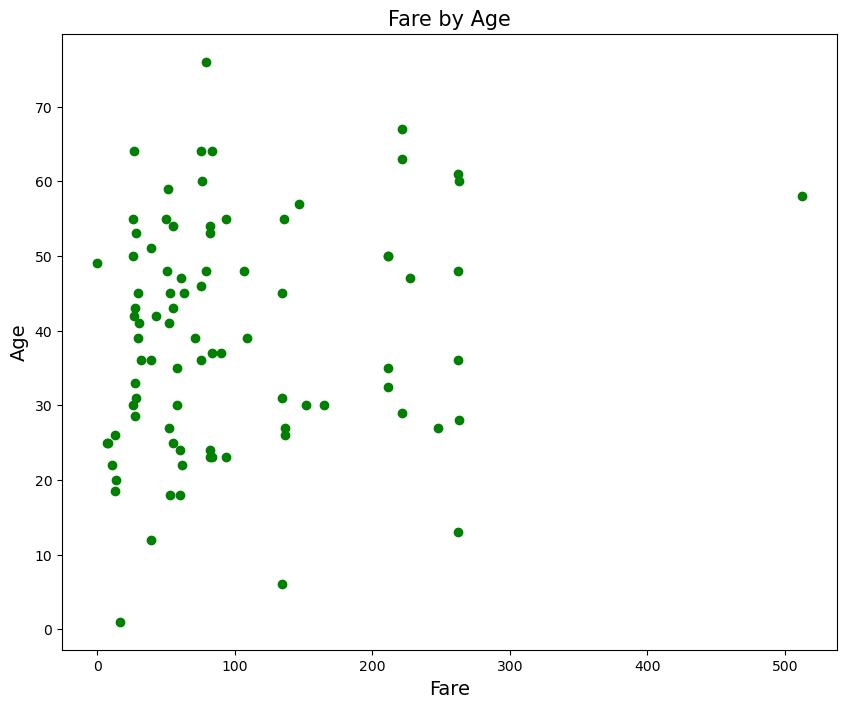

In [61]:
#Scatter plot

plt.figure(figsize = (10,8))
x = ti2['Fare']
y = ti2['Age']
plt.scatter(x,y, color = 'green')
plt.title('Fare by Age', fontsize=15)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

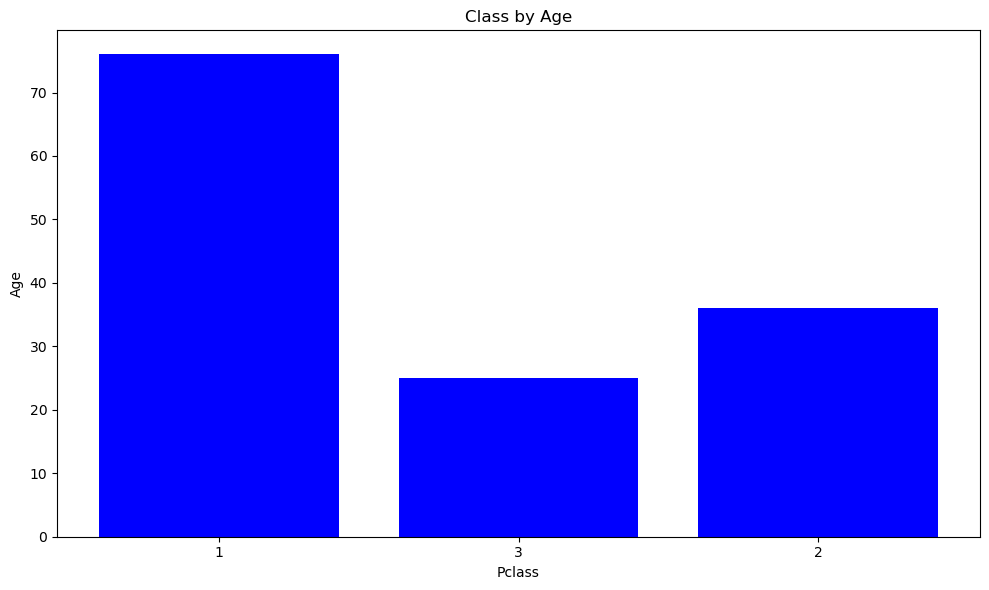

In [107]:
plt.figure(figsize=(10, 6))
plt.bar(ti2['Pclass'].astype(str), ti2['Age'], color='blue')
plt.title('Class by Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.tight_layout()
plt.show()